In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix
from sklearn.cluster import KMeans
import re
import time

import sys
import os
import warnings
warnings.filterwarnings("ignore")

# Téléchargement des ressources supplémentaires de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Farid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Farid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Farid\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Configuration du chemin d'accès aux données

In [2]:
path = 'C:/Users/Farid/Documents/OC/Cursus_Data_Scientist/Projet_6/data/Dataset/Flipkart/'

## Chargement des données

Enfin, chargeons le fichier de données des clients pour commencer notre exploration.

In [3]:
# Chargement des données
data = pd.read_csv(path + '/flipkart_com-ecommerce_sample_1050.csv')
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

# Étape 1 : Étudiez la faisabilité de classification en utilisant des méthodes NLP basiques

## Section 1 : Prétraitement des textes

### Nettoyage des données

Le nettoyage des données est crucial pour améliorer la qualité de l'information qui sera utilisée pour l'analyse. Cette étape permet de s'assurer que les données textuelles sont homogènes et prêtes pour les étapes de traitement ultérieures.

Nettoyons les données en sélectionnant uniquement les colonnes nécessaires et en gérant les valeurs manquantes :

In [5]:
# Fonction pour extraire les niveaux de catégorie
def extract_categories(path):
    categories = path.split('>>')
    main_category = categories[0].strip('["')
    sub_category = categories[1].strip() if len(categories) > 1 else None
    return main_category, sub_category

# Application de la fonction pour créer de nouvelles colonnes
data[['main_category', 'sub_category']] = data['product_category_tree'].apply(lambda x: pd.Series(extract_categories(x)))


In [6]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_category,sub_category
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen


In [7]:
# Nettoyage de la colonne 'product_category_tree' pour obtenir les deux premières catégories
def extract_main_sub_categories(category_tree):
    categories = category_tree.strip('["').split('>>')
    if len(categories) >= 2:
        # Extraction des deux premiers niveaux et suppression des espaces superflus
        return ' >> '.join([cat.strip() for cat in categories[:2]])
    elif len(categories) == 1:
        return categories[0].strip()
    else:
        return "Unknown"

data['product_category_tree'] = data['product_category_tree'].apply(extract_main_sub_categories)

In [8]:
data.sample()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_category,sub_category
752,83cef279f0ea5d772523d0d8b2923fbe,2015-12-12 11:46:53 +0000,http://www.flipkart.com/rajasthan-crafts-abstr...,Rajasthan Crafts Abstract Single Quilts & Comf...,Home Furnishing >> Bed Linen,BLAE8YHUBQ8BXRZG,950.0,840.0,83cef279f0ea5d772523d0d8b2923fbe.jpg,False,Buy Rajasthan Crafts Abstract Single Quilts & ...,No rating available,No rating available,Rajasthan Crafts,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen


In [9]:
sub_categories = data['sub_category'].unique()
len(sub_categories)

63

In [10]:
main_categories = data['main_category'].unique()
len(main_categories)

7

In [11]:
# Initialisation de l'encodeur de labels
label_encoder = LabelEncoder()

# Encodage des catégories de produits
data['label_main_category'] = label_encoder.fit_transform(data['main_category'])

# Affichage des premières lignes pour vérifier
data[['main_category', 'label_main_category']].head()

,main_category,label_main_category
0,Home Furnishing,4
1,Baby Care,0
2,Baby Care,0
3,Home Furnishing,4
4,Home Furnishing,4


In [12]:
data["label_main_category"].unique()

array([4, 0, 6, 3, 5, 1, 2])

In [13]:
# Sélection des colonnes nécessaires
data = data[['uniq_id', 'product_name', 'image', 'description', 'product_category_tree', 'main_category', 'label_main_category', 'sub_category']]


# Gestion des valeurs manquantes
data.dropna(subset=['description'], inplace=True)

In [14]:
data.head()

,uniq_id,product_name,image,description,product_category_tree,main_category,label_main_category,sub_category
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing >> Curtains & Accessories,Home Furnishing,4,Curtains & Accessories
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care >> Baby Bath & Skin,Baby Care,0,Baby Bath & Skin
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care >> Baby Bath & Skin,Baby Care,0,Baby Bath & Skin
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing >> Bed Linen,Home Furnishing,4,Bed Linen
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing >> Bed Linen,Home Furnishing,4,Bed Linen


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   uniq_id                1050 non-null   object
 1   product_name           1050 non-null   object
 2   image                  1050 non-null   object
 3   description            1050 non-null   object
 4   product_category_tree  1050 non-null   object
 5   main_category          1050 non-null   object
 6   label_main_category    1050 non-null   int32 
 7   sub_category           1050 non-null   object
dtypes: int32(1), object(7)
memory usage: 61.6+ KB


### Nettoyage des textes

Le nettoyage des textes inclut la suppression des caractères non alphabétiques et la conversion en minuscules. Cette étape aide à réduire la complexité des données textuelles et à éviter les redondances dues à la casse ou à la présence de caractères spéciaux.

In [16]:
def clean_txt(texte):
    # Suppression des caractères non alphabétiques et conversion en minuscules
    texte = re.sub(r'[^a-zA-Z]', ' ', texte)
    texte = texte.lower()
    
    # Suppression des stopwords
    mots = texte.split()
    mots_filtrés = [mot for mot in mots if mot not in stopwords.words('english')]
    texte = ' '.join(mots_filtrés)
    
    return texte

# Appliquer la fonction de nettoyage
data['description_clean'] = data['description'].apply(clean_txt)

In [17]:
# Afficher les premières lignes des descriptions nettoyées pour vérification
data[['description', 'description_clean']].head()

,description,description_clean
0,Key Features of Elegance Polyester Multicolor ...,key features elegance polyester multicolor abs...
1,Specifications of Sathiyas Cotton Bath Towel (...,specifications sathiyas cotton bath towel bath...
2,Key Features of Eurospa Cotton Terry Face Towe...,key features eurospa cotton terry face towel s...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features santosh royal fashion cotton prin...
4,Key Features of Jaipur Print Cotton Floral Kin...,key features jaipur print cotton floral king s...


In [18]:
data_clean = data.copy()
data_clean.to_csv(path + 'data_clean.csv', index=False)

### Méthodes de normalisation des mots

**Stemming**

Le stemming permet de réduire les mots à leur racine. Cette technique aide à standardiser les variations d'un même mot (par exemple, "running", "runner") afin de les traiter comme une entité unique ("run"). Cela peut réduire la taille du vocabulaire et améliorer les performances des modèles de traitement du texte.

In [19]:
stemmer = PorterStemmer()

def stemmer_texte(texte):
    mots = texte.split()
    mots_stemmed = [stemmer.stem(mot) for mot in mots]
    return ' '.join(mots_stemmed)

**Lemmatization**

La lemmatisation est une méthode plus structurée que le stemming et vise à ramener le mot à sa forme de base correcte en tenant compte de son contexte linguistique (par exemple, "better" transformé en "good"). Elle est généralement plus précise que le stemming car elle utilise des bases de données lexicales pour obtenir le lemme correct.

In [20]:
lemmatizer = WordNetLemmatizer()

def lemmatizer_texte(texte):
    mots = texte.split()
    mots_lemmatized = [lemmatizer.lemmatize(mot) for mot in mots]
    return ' '.join(mots_lemmatized)

**Tokenisation**

La tokenisation divise le texte en mots individuels (ou "tokens"). Cela permet de travailler avec chaque mot séparément lors de l'analyse du texte.

In [21]:
def tokenize_texte(texte):
    return texte.split()

**Application des fonctions**

In [22]:
# Tokeniser les descriptions
data['description_tokenized'] = data['description_clean'].apply(tokenize_texte)

# Stemming des descriptions
data['description_stemmed'] = data['description_clean'].apply(stemmer_texte)

# Lemmatization des descriptions
data['description_lemmatized'] = data['description_clean'].apply(lemmatizer_texte)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uniq_id                 1050 non-null   object
 1   product_name            1050 non-null   object
 2   image                   1050 non-null   object
 3   description             1050 non-null   object
 4   product_category_tree   1050 non-null   object
 5   main_category           1050 non-null   object
 6   label_main_category     1050 non-null   int32 
 7   sub_category            1050 non-null   object
 8   description_clean       1050 non-null   object
 9   description_tokenized   1050 non-null   object
 10  description_stemmed     1050 non-null   object
 11  description_lemmatized  1050 non-null   object
dtypes: int32(1), object(11)
memory usage: 94.5+ KB


In [24]:
# Augmenter la limite de caractères affichés par colonne
pd.set_option('display.max_colwidth', None)

# Afficher les premières lignes des descriptions pour vérification
data[['description_clean', 'description_stemmed', 'description_lemmatized', 'description_tokenized']].head()

,description_clean,description_stemmed,description_lemmatized,description_tokenized
0,key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain cm height pack price rs curtain enhances look interiors curtain made high quality polyester fabric features eyelet style stitch metal ring makes room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain cm height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimensions length cm box number contents sales package pack sales package curtains body design material polyester,key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain cm height pack price rs curtain enhanc look interior curtain made high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain cm height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model id duster color multicolor dimens length cm box number content sale packag pack sale packag curtain bodi design materi polyest,key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain cm height pack price r curtain enhances look interior curtain made high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain cm height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length cm box number content sale package pack sale package curtain body design material polyester,"[key, features, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtain, elegance, polyester, multicolor, abstract, eyelet, door, curtain, cm, height, pack, price, rs, curtain, enhances, look, interiors, curtain, made, high, quality, polyester, fabric, features, eyelet, style, stitch, metal, ring, makes, room, environment, romantic, loving, curtain, ant, wrinkle, anti, shrinkage, elegant, apparance, give, home, bright, modernistic, appeal, designs, surreal, attention, sure, steal, hearts, contemporary, eyelet, valance, curtains, slide, smoothly, draw, apart, first, thing, morning, welcome, bright, sun, rays, want, wish, good, morning, whole, world, draw, close, evening, create, special, moments, joyous, beauty, given, soothing, prints, bri

## Section 2 : Méthodes basiques d’encodage de texte

**Encodage Bag of Words (BoW)**

La méthode Bag of Words crée une représentation des textes sous forme de vecteurs de fréquences de mots. Chaque dimension du vecteur correspond à un mot unique dans le corpus, et la valeur dans chaque dimension représente la fréquence de ce mot dans le document.

In [25]:
# Initialisation du vectoriseur
vectorizer_bow = CountVectorizer()

# Application du vectoriseur aux descriptions nettoyées
bow_matrix = vectorizer_bow.fit_transform(data['description_clean'])

# Affichage de la taille de la matrice BoW et du type de données
print("Taille de la matrice BoW : ", bow_matrix.shape)
print(f"Type de la matrice BoW :  {type(bow_matrix)}\n")

# Visualisation de quelques exemples
feature_names_bow = vectorizer_bow.get_feature_names_out()
print(f"Quelques mots du vocabulaire BoW : , {feature_names_bow[:20]}\n")

# Afficher un exemple de vecteur BoW pour un document
example_bow = pd.DataFrame(bow_matrix[0].T.todense(), index=feature_names_bow, columns=["Frequency"])
example_bow = example_bow[example_bow["Frequency"] > 0]  # Filtrer pour montrer uniquement les mots présents
print("Exemple de vecteur BoW pour le premier document :\n", example_bow)


Taille de la matrice BoW :  (1050, 5075)
Type de la matrice BoW :  <class 'scipy.sparse._csr.csr_matrix'>

Quelques mots du vocabulaire BoW : , ['aa' 'aaa' 'aapno' 'aari' 'aarika' 'abilities' 'ability' 'abkl' 'able'
 'abode' 'abrasions' 'abroad' 'absolute' 'absorbency' 'absorbent'
 'absorber' 'absorbing' 'absorbs' 'abstract' 'abstracts']

Exemple de vecteur BoW pour le premier document :
           Frequency
abstract          4
amount            1
ant               1
anti              1
apart             1
...             ...
welcome           1
whole             1
wish              1
world             1
wrinkle           1

[105 rows x 1 columns]


**Encodage TF-IDF (Term Frequency-Inverse Document Frequency)**

TF-IDF permet de mesurer l'importance d'un mot dans un document par rapport au corpus entier. Cette technique aide à mettre en évidence les mots qui sont fréquents dans un document mais rares dans le reste du corpus, leur donnant ainsi plus de poids.

In [26]:
# Initialisation du vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Application du vectoriseur aux descriptions nettoyées
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description_clean'])

# Affichage de la taille de la matrice TF-IDF et du type de données
print("Taille de la matrice TF-IDF : ", tfidf_matrix.shape)
print(f"Type de la matrice TF-IDF :  {type(tfidf_matrix)}\n")

# Visualisation de quelques exemples
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
print(f"Quelques mots du vocabulaire TF-IDF :  {feature_names_tfidf[:20]}\n")

# Afficher un exemple de vecteur TF-IDF pour un document
example_tfidf = pd.DataFrame(tfidf_matrix[0].T.todense(), index=feature_names_tfidf, columns=["TF-IDF"])
example_tfidf = example_tfidf[example_tfidf["TF-IDF"] > 0]  # Filtrer pour montrer uniquement les mots avec un score TF-IDF
print("Exemple de vecteur TF-IDF pour le premier document :\n", example_tfidf)


Taille de la matrice TF-IDF :  (1050, 5075)
Type de la matrice TF-IDF :  <class 'scipy.sparse._csr.csr_matrix'>

Quelques mots du vocabulaire TF-IDF :  ['aa' 'aaa' 'aapno' 'aari' 'aarika' 'abilities' 'ability' 'abkl' 'able'
 'abode' 'abrasions' 'abroad' 'absolute' 'absorbency' 'absorbent'
 'absorber' 'absorbing' 'absorbs' 'abstract' 'abstracts']

Exemple de vecteur TF-IDF pour le premier document :
             TF-IDF
abstract  0.178135
amount    0.069738
ant       0.069738
anti      0.060014
apart     0.072791
...            ...
welcome   0.072791
whole     0.063799
wish      0.069738
world     0.058079
wrinkle   0.072791

[105 rows x 1 columns]


**Visualisation et Analyse des Résultats**

In [27]:
# Exemple pour visualiser le vocabulaire dans BoW
feature_names = vectorizer_bow.get_feature_names_out()
print("Quelques mots du vocabulaire BoW : ", feature_names[:20])

# Exemple pour visualiser le vocabulaire dans TF-IDF
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
print("Quelques mots du vocabulaire TF-IDF : ", feature_names_tfidf[:20])


Quelques mots du vocabulaire BoW :  ['aa' 'aaa' 'aapno' 'aari' 'aarika' 'abilities' 'ability' 'abkl' 'able'
 'abode' 'abrasions' 'abroad' 'absolute' 'absorbency' 'absorbent'
 'absorber' 'absorbing' 'absorbs' 'abstract' 'abstracts']
Quelques mots du vocabulaire TF-IDF :  ['aa' 'aaa' 'aapno' 'aari' 'aarika' 'abilities' 'ability' 'abkl' 'able'
 'abode' 'abrasions' 'abroad' 'absolute' 'absorbency' 'absorbent'
 'absorber' 'absorbing' 'absorbs' 'abstract' 'abstracts']


**Analyse des fréquences des mots :**

Pour mieux comprendre les données, nous pouvons explorer les fréquences des mots les plus communs ou les plus rares dans les matrices BoW et TF-IDF. Cela peut nous aider à identifier si certains mots peu informatifs échappent aux filtres ou si des mots clés importants sont bien représentés.

**Définition de la Fonction pour l'Analyse des Fréquences**

In [28]:
# Définition de la fonction pour afficher les fréquences des mots
def display_word_frequencies(matrix, vectorizer, top_n=20):
    # Calcul des sommes des fréquences pour chaque terme
    sum_words = matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Affichage des mots les plus fréquents
    print(f"Top {top_n} des mots les plus fréquents/pondérés:")
    for word, freq in words_freq[:top_n]:
        print(f"{word}: {freq}")
        
    return words_freq[:top_n]

Analyse de fréquence pour Bag of Words:
Top 20 des mots les plus fréquents/pondérés:
rs: 911
products: 631
free: 618
buy: 581
delivery: 567
cash: 564
genuine: 564
shipping: 564
replacement: 559
cm: 558
day: 540
flipkart: 481
com: 473
guarantee: 471
online: 396
features: 395
specifications: 371
price: 352
watch: 330
color: 328
Top 20 des mots les plus fréquents/pondérés:
rs: 911
products: 631
free: 618
buy: 581
delivery: 567
cash: 564
genuine: 564
shipping: 564
replacement: 559
cm: 558
day: 540
flipkart: 481
com: 473
guarantee: 471
online: 396
features: 395
specifications: 371
price: 352
watch: 330
color: 328


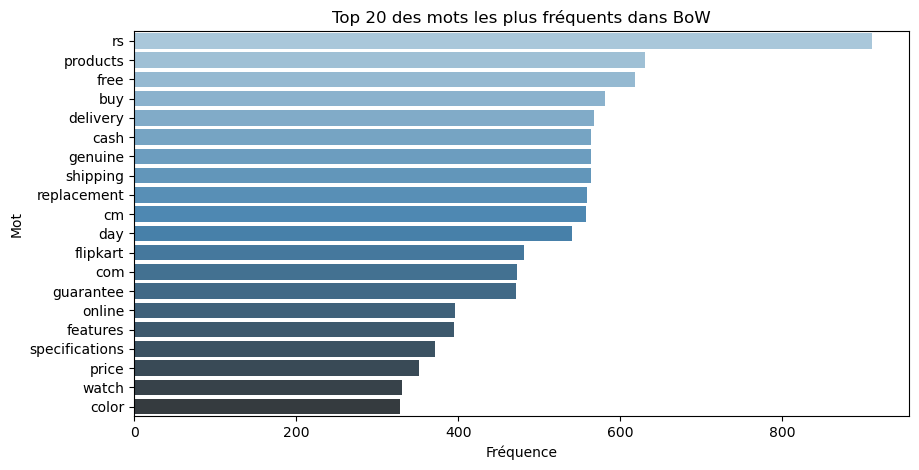

In [29]:
# Analyse de fréquence pour Bag of Words
print("Analyse de fréquence pour Bag of Words:")
display_word_frequencies(bow_matrix, vectorizer_bow)

# Appel de la fonction et stockage du résultat
top_words_freq = display_word_frequencies(bow_matrix, vectorizer_bow)

# Création du DataFrame pour la visualisation
plt.figure(figsize=(10, 5))
freq_df = pd.DataFrame(top_words_freq, columns=['Mot', 'Fréquence'])
sns.barplot(x='Fréquence', y='Mot', data=freq_df, palette='Blues_d')
plt.title('Top 20 des mots les plus fréquents dans BoW')
plt.show()


Top 20 des mots les plus fréquents/pondérés:
com: 55.43736355675078
flipkart: 55.102645178574114
cash: 46.46681519575796
genuine: 46.46681519575796
shipping: 46.46681519575796
delivery: 46.399326651638425
products: 46.390646663944075
free: 45.967377236354444
buy: 45.91784650435447
day: 39.520369111246524
replacement: 39.32055199710936
guarantee: 38.8337776677437
rs: 38.51056136059474
online: 31.656409811067793
cm: 31.126834613090207
watch: 30.261272877899934
analog: 27.391970590810022
set: 25.768075509686692
mug: 21.769305113708242
baby: 21.179527280518002


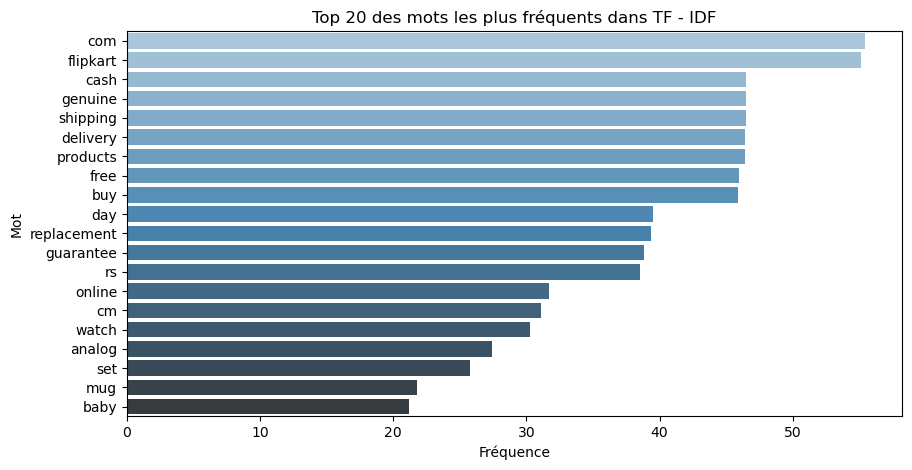

In [30]:
# Appel de la fonction et stockage du résultat
top_words_freq = display_word_frequencies(tfidf_matrix, tfidf_vectorizer)

# Création du DataFrame pour la visualisation
plt.figure(figsize=(10, 5))
freq_df = pd.DataFrame(top_words_freq, columns=['Mot', 'Fréquence'])
sns.barplot(x='Fréquence', y='Mot', data=freq_df, palette='Blues_d')
plt.title('Top 20 des mots les plus fréquents dans TF - IDF')
plt.show()


**Observations Clés**

1. **Présence de Mots Génériques et Peu Informatifs :**
* Des mots comme "rs" (probablement pour Rupees), "buy", "free", "delivery", "cash", et "shipping" sont très fréquents. Ces mots semblent être liés aux conditions de vente ou à des aspects logistiques plutôt qu'au contenu descriptif des produits eux-mêmes. Ils pourraient être moins utiles pour distinguer entre différentes catégories de produits.
2. **Mots Spécifiques à un Contexte Commercial :**
* Des termes comme "genuine", "replacement", "guarantee", et "flipkart" sont également fréquents et fortement pondérés dans TF-IDF. Cela indique que notre corpus contient beaucoup de texte lié aux politiques de vente ou à l'identité de la marque, ce qui peut ou non être utile selon l'objectif de notre analyse.
3. **Termes Techniques ou Spécifiques aux Produits :**
* Des mots comme "cm" (centimètres), "watch", "color", "analog", "set", "mug", et "baby" sont plus descriptifs en termes de caractéristiques ou de catégories de produits. Ces mots sont probablement plus utiles pour classifier les produits.

## Section 3 : Méthodes de réduction de dimension sur le texte encodé

Pour Notre projet, nous pouvons considérer deux techniques courantes : l'Analyse en Composantes Principales (PCA) et t-Distributed Stochastic Neighbor Embedding (t-SNE).

### PCA (Principal Component Analysis)

In [31]:
# Création d'une instance PCA qui conserve 99% de la variance
print(tfidf_matrix.toarray().shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(tfidf_matrix.toarray())
print(feat_pca.shape)

(1050, 5075)
(1050, 811)


### t-SNE

In [32]:
temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print(f"Temps de T-SNE : {duration1:15.2f} secondes")

  File "C:\Users\Farid\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Temps de T-SNE :           13.50 secondes


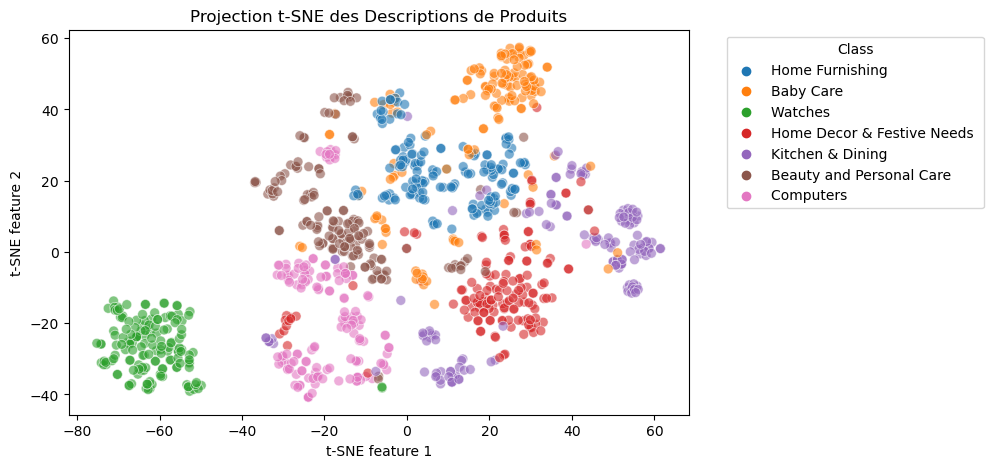

In [33]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["main_category"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('Projection t-SNE des Descriptions de Produits')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Coloration des Clusters Selon les Catégories Réelles

Il faut gardez à l'esprit que cette méthode suppose que le nombre de catégories n'est pas trop élevé, sinon la légende serait trop chargée et difficile à lire.

In [34]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

KMeans(n_clusters=7, n_init=100)

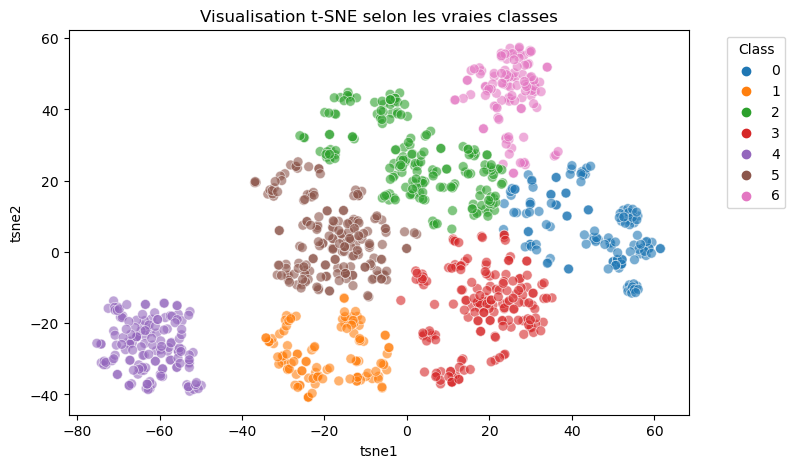

ARI :  0.5249415037976954


In [35]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('Visualisation t-SNE selon les vraies classes')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

labels = data["label_main_category"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes

In [36]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[  8   0  24  13   0  12  93]
 [  3   2  19  10   0 115   1]
 [  1  88  12   0   0  49   0]
 [ 22  11   0 111   0   5   1]
 [  5   0 127   0   0   4  14]
 [ 98   8   4  36   0   2   2]
 [  0   2   0   0 148   0   0]]


In [37]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [38]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [5 2 4 3 6 1 0]
[[ 93  12   0  13  24   8   0]
 [  1 115   2  10  19   3   0]
 [  0  49  88   0  12   1   0]
 [  1   5  11 111   0  22   0]
 [ 14   4   0   0 127   5   0]
 [  2   2   8  36   4  98   0]
 [  0   0   2   0   0   0 148]]

              precision    recall  f1-score   support

           0       0.84      0.62      0.71       150
           1       0.61      0.77      0.68       150
           2       0.79      0.59      0.67       150
           3       0.65      0.74      0.69       150
           4       0.68      0.85      0.76       150
           5       0.72      0.65      0.68       150
           6       1.00      0.99      0.99       150

    accuracy                           0.74      1050
   macro avg       0.76      0.74      0.74      1050
weighted avg       0.76      0.74      0.74      1050



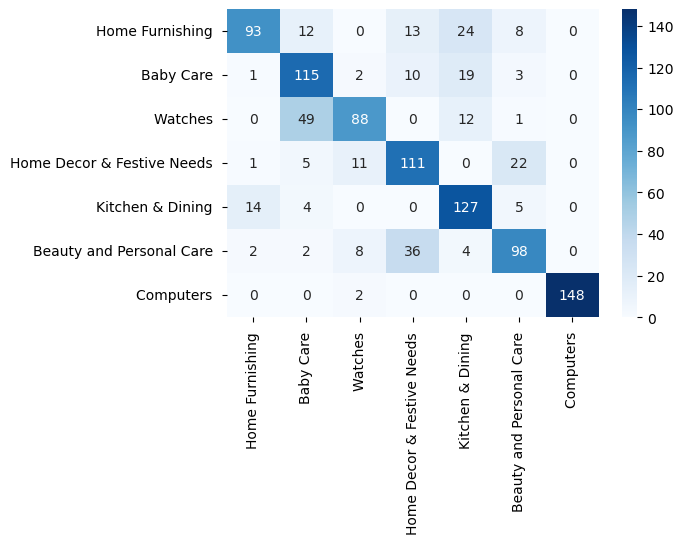

In [39]:
list_labels = data["main_category"].unique()

# Création du DataFrame pour la heatmap
df_cm = pd.DataFrame(conf_mat, index = list_labels, columns = list_labels)

# Format des annotations
fmt = 'd'

plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt=fmt)

# Affichage de la heatmap
plt.show()